In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

In [2]:
fb_data = pd.read_csv('data/full_body.csv')

# LDA

In [3]:
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit KMeans to the data
kmeans.fit(fb_data)

# Get cluster assignments and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(fb_data, labels)

In [5]:
centers_lda = lda.transform(centers)

/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


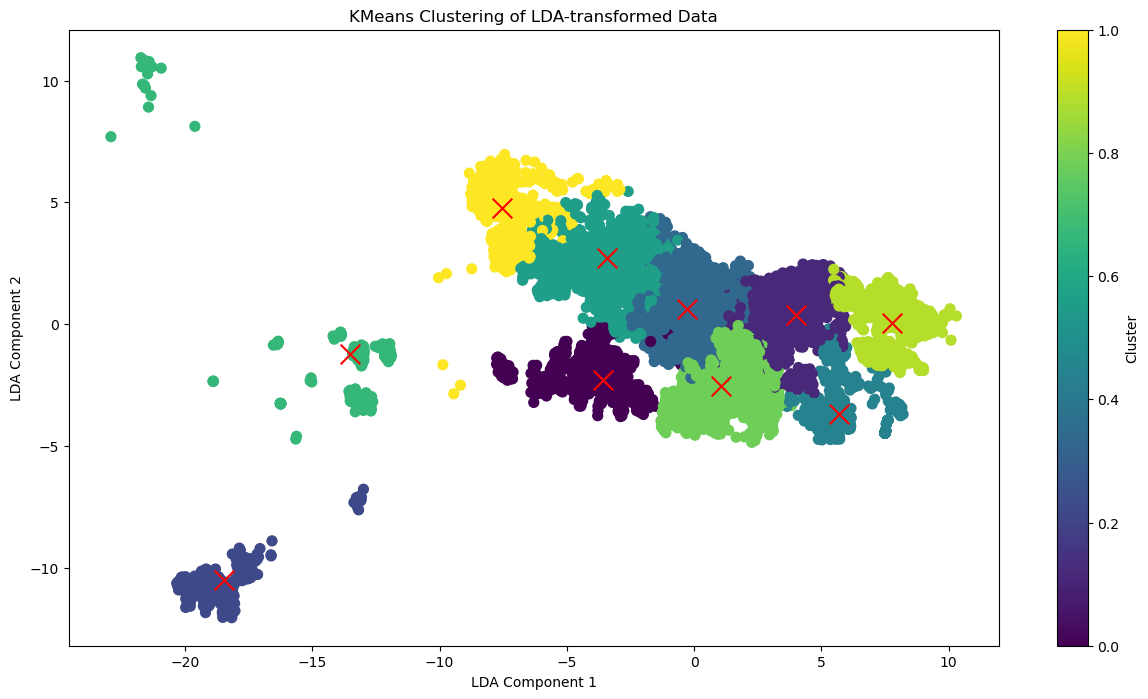

In [6]:
# Plot the clusters
plt.figure(figsize=(15, 8))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers_lda[:, 0], centers_lda[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('KMeans Clustering of LDA-transformed Data')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar(label='Cluster')
plt.show()